# Microcredit Risk Scoring Project Group - EDA & Cleaning
L. Collins, K. Said, K. Filipov, A. Melchor Pérez.

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as py
from sklearn.preprocessing import LabelEncoder

## Loading the data

In [ ]:
data = pd.read_excel('loans_samp.xlsx')

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,id,description.languages,status,funded_amount,paid_amount,activity,sector,location.country_code,location.country,location.town,location.geo.level,partner_id,borrowers.first_name,borrowers.last_name,borrowers.gender,borrowers.pictured,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.loss_liability.nonpayment,terms.loss_liability.currency_exchange,posted_date,funded_date,journal_totals.entries,paid_date,defaulted_date,terms.local_payments.due_date,terms.local_payments.amount,terms.scheduled_payments.due_date,terms.scheduled_payments.amount,delinquent,video.youtube_id,basket_amount,amount,payment_id,local_amount,processed_date,rounded_local_amount,settlement_date,lat,lon
0,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,town,5,Marks Antonio,Fernandez,M,True,500,USD,2005-04-14 00:00:00,500.0,partner,none,2006-02-15 00:00:00,2005-03-31 00:00:00,1.0,2006-09-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,209.0,50.0,2006-04-20,50.0,2006-09-16,12150833.0,-86268333.0
1,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,town,5,Marks Antonio,Fernandez,M,True,500,USD,2005-04-14 00:00:00,500.0,partner,none,2006-02-15 00:00:00,2005-03-31 00:00:00,1.0,2006-09-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,362.0,50.0,2006-06-05,50.0,2006-09-16,12150833.0,-86268333.0
2,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,town,5,Marks Antonio,Fernandez,M,True,500,USD,2005-04-14 00:00:00,500.0,partner,none,2006-02-15 00:00:00,2005-03-31 00:00:00,1.0,2006-09-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,616.0,50.0,2006-07-31,50.0,2006-09-16,12150833.0,-86268333.0
3,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,town,5,Marks Antonio,Fernandez,M,True,500,USD,2005-04-14 00:00:00,500.0,partner,none,2006-02-15 00:00:00,2005-03-31 00:00:00,1.0,2006-09-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,913.0,270.0,2006-08-17,270.0,2006-09-16,12150833.0,-86268333.0
4,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,town,5,Marks Antonio,Fernandez,M,True,500,USD,2005-04-14 00:00:00,500.0,partner,none,2006-02-15 00:00:00,2005-03-31 00:00:00,1.0,2006-09-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,1283.0,80.0,2006-09-16,80.0,2006-09-16,12150833.0,-86268333.0


## Data exploration

In [ ]:
# A quick insight into the variables is given
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42122 entries, 0 to 42121
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   id                                      42122 non-null  object        
 1   description.languages                   30097 non-null  object        
 2   status                                  42122 non-null  object        
 3   funded_amount                           42122 non-null  object        
 4   paid_amount                             41516 non-null  object        
 5   activity                                42122 non-null  object        
 6   sector                                  42122 non-null  object        
 7   location.country_code                   41215 non-null  object        
 8   location.country                        42122 non-null  object        
 9   location.town                           41348 non-

As can be observed, the dataset contains 42122 entries and has 41 features. Most datatypes are of type 'object' but the datatype 'float' and 'datetime' are also included. Not every record has values for each feature and the feature type 'basket_amount' contains no values.

## Data cleaning

### Initial dropping of features and rows

For purpose of anonymity, names of the borrowers will be removed  as well as the youtube_id to ensure that they are not traceable
The 'basket_amount' is an empty column and will also be removed

In [ ]:
data = data.drop(columns=['basket_amount','borrowers.first_name','borrowers.last_name' ,'video.youtube_id'])

Two cases have a format that is inconsistent/incorrect with the format provided and will therefore be removed


In [ ]:
#data.iloc[28536]
#data.iloc[30488]
delete = {'id': ['anica"','a"']}
for column, values_to_delete in delete.items():
    data = data[~data[column].isin(values_to_delete)]


### Converting to the correct datatype as some variables should either be of numerical or date_time datatype

#### Converting columns intended to be numbers into a numerical datatype

In [ ]:
# Selecting the columns that needs to be converted into numerical after inspecting the dataframe
columns_to_convert =["funded_amount", "paid_amount", "partner_id", "terms.disbursal_amount", "terms.loan_amount", "journal_totals.entries","terms.local_payments.amount",
                     "terms.scheduled_payments.amount","id"]

data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric)


#### Converting all dates into date-time variables

In [ ]:
date_columns = ["terms.disbursal_date" , "posted_date" , "funded_date", "paid_date","defaulted_date", "terms.local_payments.due_date",
                "terms.scheduled_payments.due_date"]
data[date_columns] = data[date_columns].apply(pd.to_datetime)
print(data.dtypes)  # Check data types after conversion

id                                                 int64
description.languages                             object
status                                            object
funded_amount                                      int64
paid_amount                                      float64
activity                                          object
sector                                            object
location.country_code                             object
location.country                                  object
location.town                                     object
location.geo.level                                object
partner_id                                       float64
borrowers.gender                                  object
borrowers.pictured                                object
terms.disbursal_amount                           float64
terms.disbursal_currency                          object
terms.disbursal_date                      datetime64[ns]
terms.loan_amount              

#### The descriptive statistics of the dataset are given


In [ ]:
data.describe()

,id,funded_amount,paid_amount,partner_id,terms.disbursal_amount,terms.loan_amount,journal_totals.entries,terms.local_payments.amount,terms.scheduled_payments.amount,delinquent,amount,payment_id,local_amount,rounded_local_amount,lat,lon
count,42085.000000,42085.000000,41479.000000,42083.000000,4.207800e+04,42078.000000,42061.000000,4.200900e+04,42009.000000,1895.0,42078.000000,4.207800e+04,4.207800e+04,4.207800e+04,4.207800e+04,4.207800e+04
mean,72653.946798,680.902935,604.200872,67.396146,8.951627e+05,680.918176,1.388079,5.145937e+04,81.212626,1.0,65.265536,4.499265e+07,5.516449e+04,5.394330e+04,3.431283e+06,-5.234482e+06
std,42066.729164,567.307259,546.415564,39.692933,3.391781e+06,567.343584,0.638449,2.385760e+05,131.560985,0.0,87.019130,4.091286e+07,2.552949e+05,2.166499e+05,1.291865e+07,6.022530e+07
min,156.000000,25.000000,1.560000,2.000000,5.000000e+01,25.000000,1.000000,0.000000e+00,0.000000,1.0,-504.000000,1.890000e+02,-5.040000e+02,-5.040000e+02,-2.634278e+07,-1.723333e+08
25%,36873.000000,325.000000,253.270000,25.000000,1.000000e+03,325.000000,1.000000,6.929000e+01,32.810000,1.0,19.380000,3.241018e+05,7.100000e+01,7.200000e+01,-2.833330e-01,-7.600000e+01
50%,73100.000000,550.000000,497.260000,67.000000,4.160000e+03,550.000000,1.000000,2.592600e+02,55.560000,1.0,48.000000,3.602980e+07,2.777800e+02,2.996900e+02,1.300000e+01,1.038500e+02
75%,106427.000000,925.000000,800.000000,102.000000,9.000000e+04,925.000000,2.000000,8.735960e+03,85.000000,1.0,83.000000,8.704656e+07,9.000000e+03,9.382040e+03,6.083333e+06,1.166667e+06
max,165749.000000,10000.000000,5000.000000,149.000000,1.000000e+08,10000.000000,7.000000,8.333333e+06,2007.810000,1.0,1942.600000,1.107969e+08,8.480000e+06,7.160370e+06,4.978333e+07,1.260636e+08


#### Plotting the correlation matrix for all the numerical values

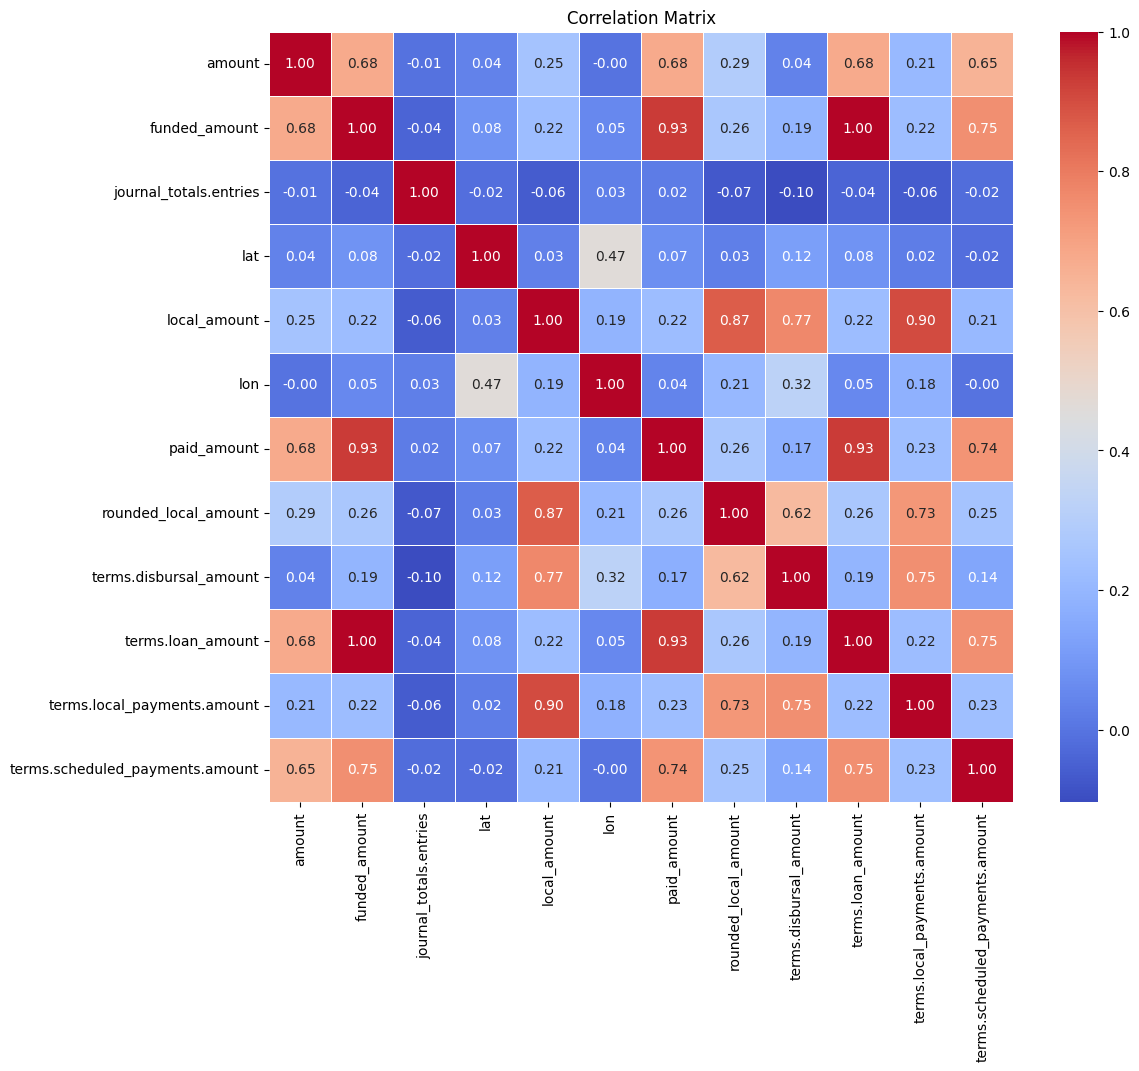

In [ ]:
# Excluding the id variables and the categorical "delinquent" variable
columns_to_exclude = ["id", "partner_id", "payment_id", "delinquent"]

# Select columns for correlation calculation
columns_for_corr = data.columns.difference(columns_to_exclude)

# Calculate the correlation matrix
corr_matrix = data[columns_for_corr].corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Customize the plot
plt.title("Correlation Matrix")
plt.show()


## Exploratory Visualizations

### Firstly some insights into the different countries

In [ ]:
#There exist multiple instances for each initiative, which is why they are filtered by id for EDA purposes
single_id= data.drop_duplicates(subset='id')

applicant_country= single_id["location.country"].value_counts()
#Amount of countries
print(f"There are applicants from { applicant_country.count()} countries")

There are applicants from 51 countries


#### Amount of applicants from each country

<ipython-input-12-72a14f7397f4>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




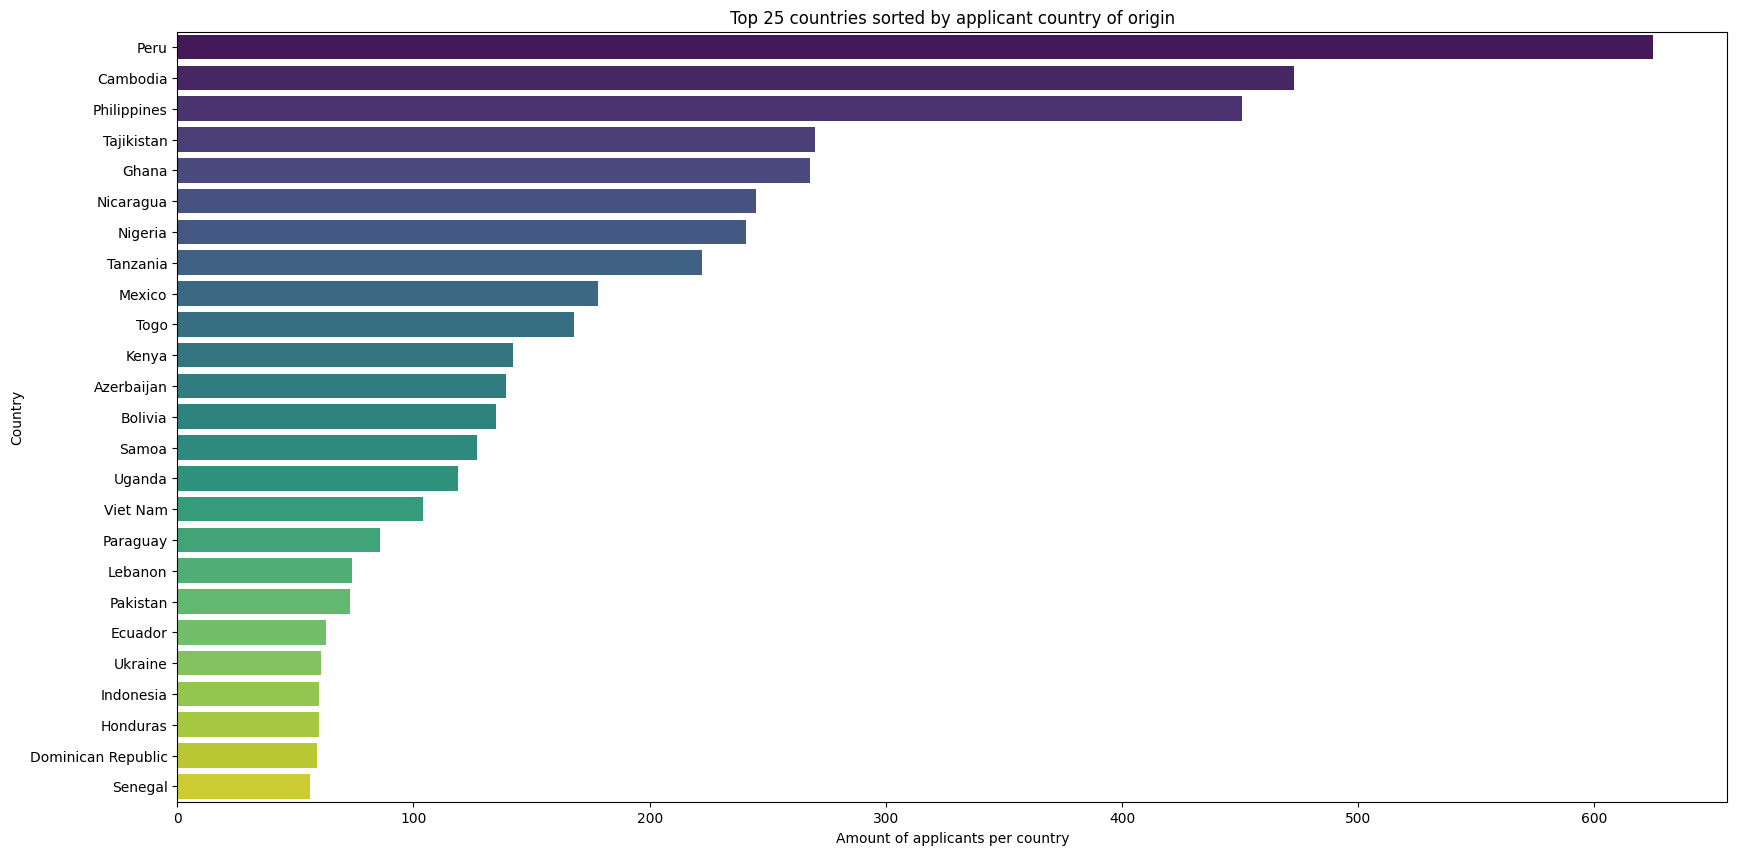

In [ ]:
# A barchart with the top 25 represented countries based on applicant origin are shown
plt.figure(figsize=(20,10))
amount_country = applicant_country.sort_values(ascending=False)
sns.barplot(y=amount_country.head(25).index, x=amount_country.head(25),palette="viridis")
plt.ylabel('Country')
plt.xlabel('Amount of applicants per country')
plt.title('Top 25 countries sorted by applicant country of origin')
plt.show()


In [ ]:
print(f'There are {single_id["funded_amount"].count()} given loans')

There are 5000 given loans


#### A chloropleth map is created showing the density of amount of applicants per country

In [ ]:

# Counting the number of loans per country and creating a dataframe
countries = pd.DataFrame(single_id['location.country'].value_counts()).reset_index()

countries.columns = ['country', 'num_loans']

# Resetting index and dropping the previous index column
countries = countries.reset_index().drop('index', axis=1)


choropleth_data = [
    dict(
        type='choropleth',
        locations=countries['country'],
        locationmode='country names',
        z=countries['num_loans'],  # Assigning number of loans as data for visualization
        text=countries['country'],  # Setting text for display on hover
        colorscale='Reds',
        reversescale=False,
        autocolorscale=False,
        marker=dict(
            line=dict(
                color='rgb(180,180,180)',
                width=0.5  )),
        colorbar=dict(
            autotick=False,
            tickprefix='',
            # Setting title for the colorbar
            title='Number of Applicants'   ) )]

layout_settings = dict(
    title='Number of Applicants by Country',  # Setting the title for the plot
    geo=dict(showcoastlines=True,
        projection=dict(type='Mercator')
    ),width=1000,  height=600   )

# Creating the final figure object for the choropleth map
figure = dict(data=choropleth_data, layout=layout_settings)

py.iplot(figure, validate=False, filename='loans-world-map')

#### The total funded amount per country is shown, this includes the top 30

<ipython-input-15-ff5a9989c601>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




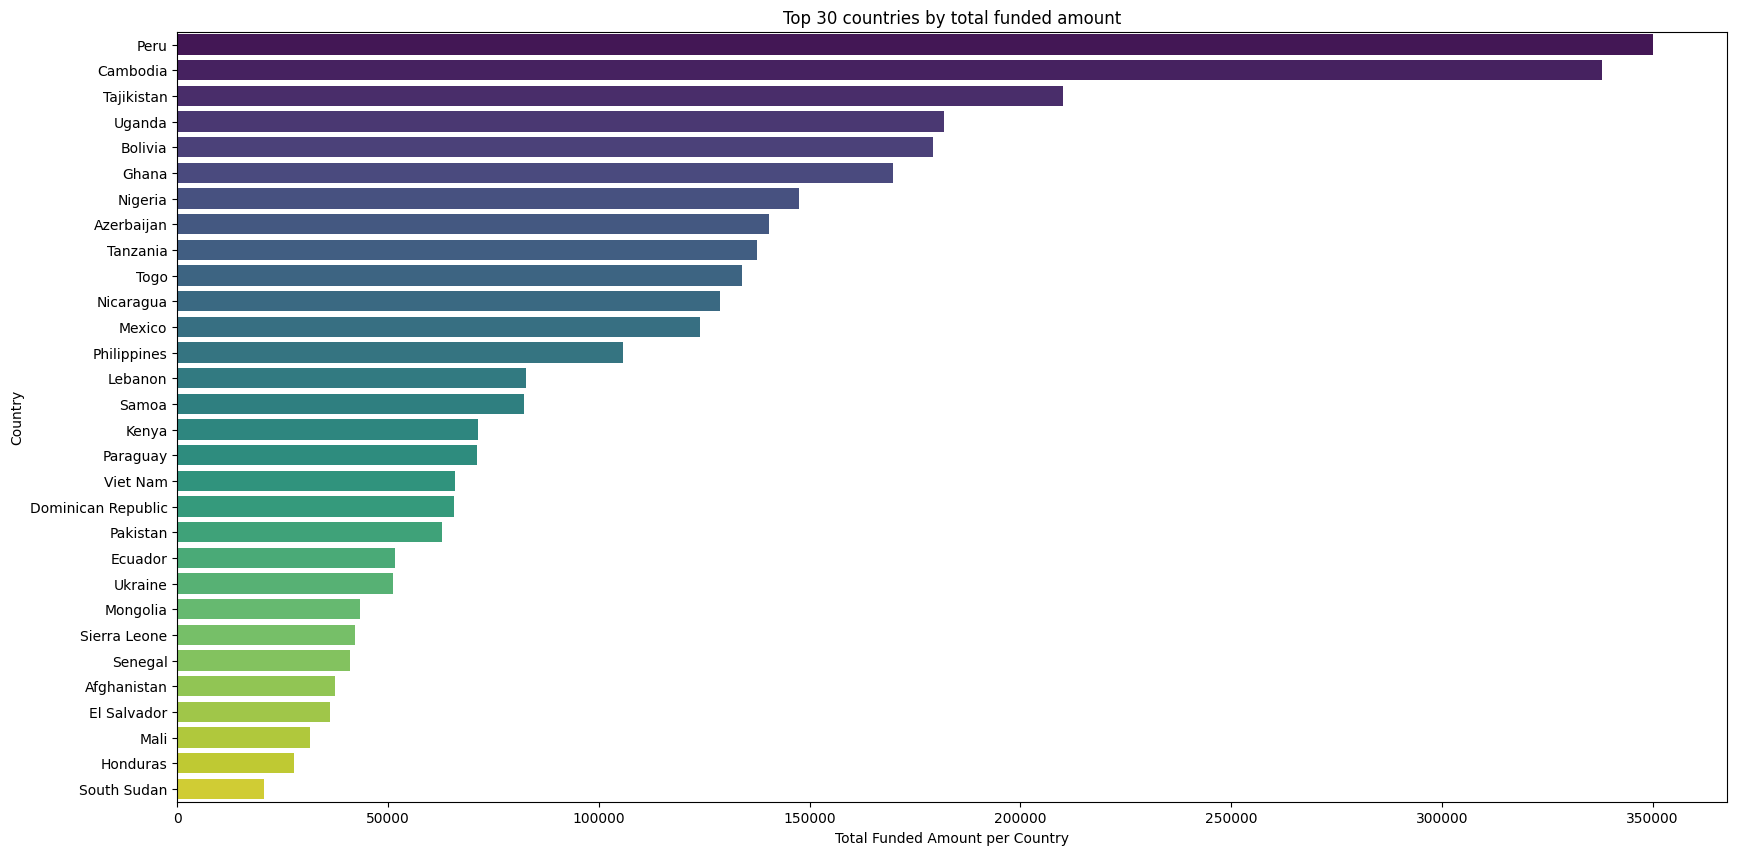

In [ ]:

# Calculate the total funded amount for each country
total_funded_per_country = single_id.groupby('location.country')['funded_amount'].sum().reset_index()

# Sort the data by total funded amount
total_funded_per_country = total_funded_per_country.sort_values(by='funded_amount', ascending=False)

plt.figure(figsize=(20, 10))

# Create a bar plot
sns.barplot(data=total_funded_per_country.head(30), y="location.country", x='funded_amount', palette="viridis")
plt.ylabel('Country')
plt.xlabel('Total Funded Amount per Country')
plt.title('Top 30 countries by total funded amount')

plt.show()

### More insight into individual statistics

#### The top 30 loan amounts for the applicants

<ipython-input-16-195563fac5a4>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Top 30 applicant loan amounts')

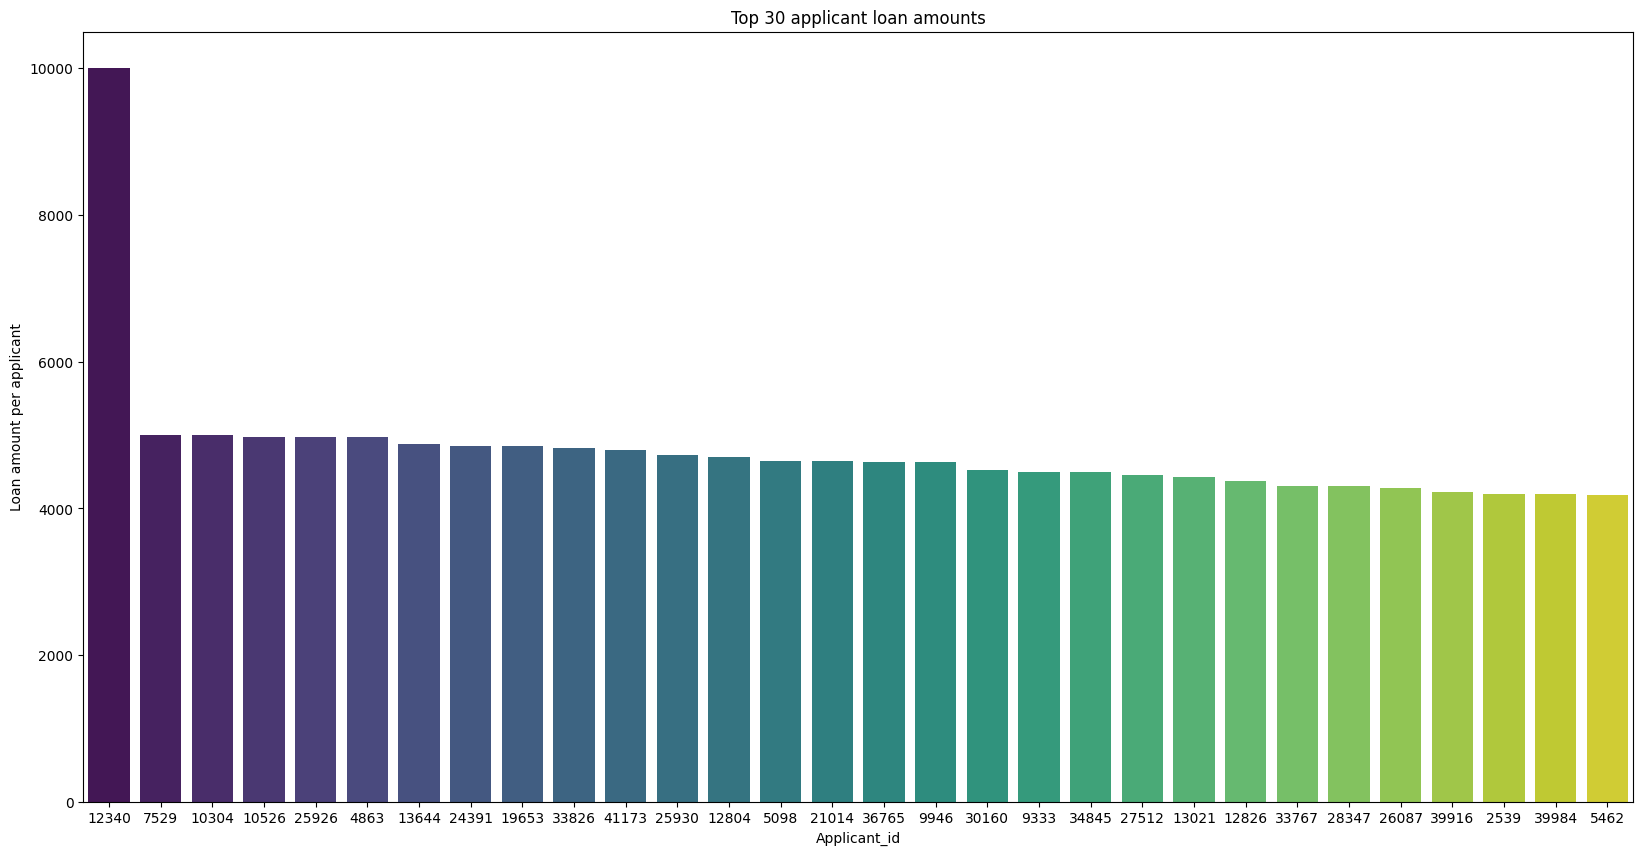

In [ ]:
# Sort the funded amounts
sort = single_id["funded_amount"].sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(20,10))
sort = single_id["funded_amount"].sort_values(ascending=False)
sns.barplot(x=sort.head(30).index, y=sort.head(30),palette="viridis",order=sort.head(30).index)
plt.xlabel('Applicant_id')
plt.ylabel('Loan amount per applicant')
plt.title('Top 30 applicant loan amounts')



#### The distribution of the funded amounts

<Figure size 1000x1000 with 0 Axes>

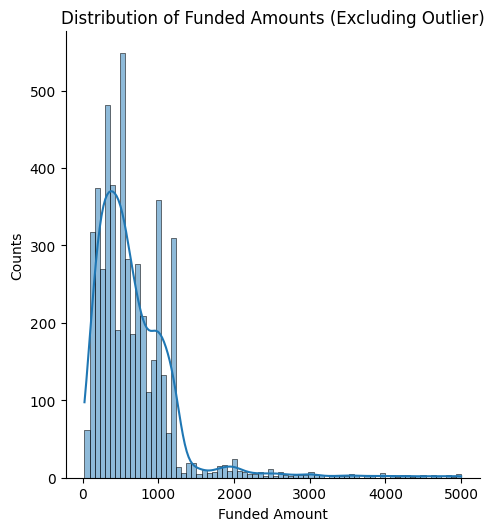

In [ ]:
# The value of 10000 is excluded to give a better picture of the distribution
filtered_loan_amounts = [amount for amount in single_id["funded_amount"] if amount < 10000]

#Plotting the distribution plot
fig = plt.figure(figsize=(10, 10))

sns.displot( x=filtered_loan_amounts, kde=True)

plt.title('Distribution of Funded Amounts (Excluding Outlier)')
plt.xlabel('Funded Amount')
plt.ylabel('Counts')
plt.show()


### Looking into gender distribution

In [ ]:
gender=single_id["borrowers.gender"].value_counts()

#### Creating a pie chart

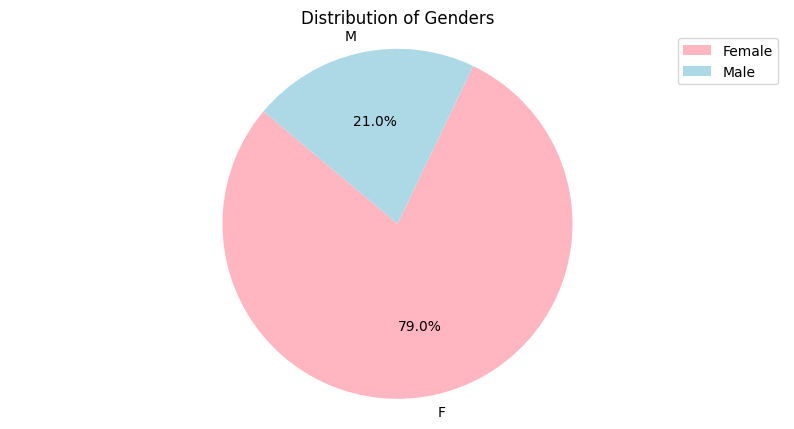

In [ ]:
colors = ['#FFB6C1','#ADD8E6']

# Creating a pie chart
plt.figure(figsize=(10, 5))
patches, texts, _ = plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Genders')
plt.axis('equal')

# Creating legend based on gender categories
plt.legend(patches,['Female', 'Male'], loc="best")

plt.show()

#### Showing the distribution of funded amount per gender

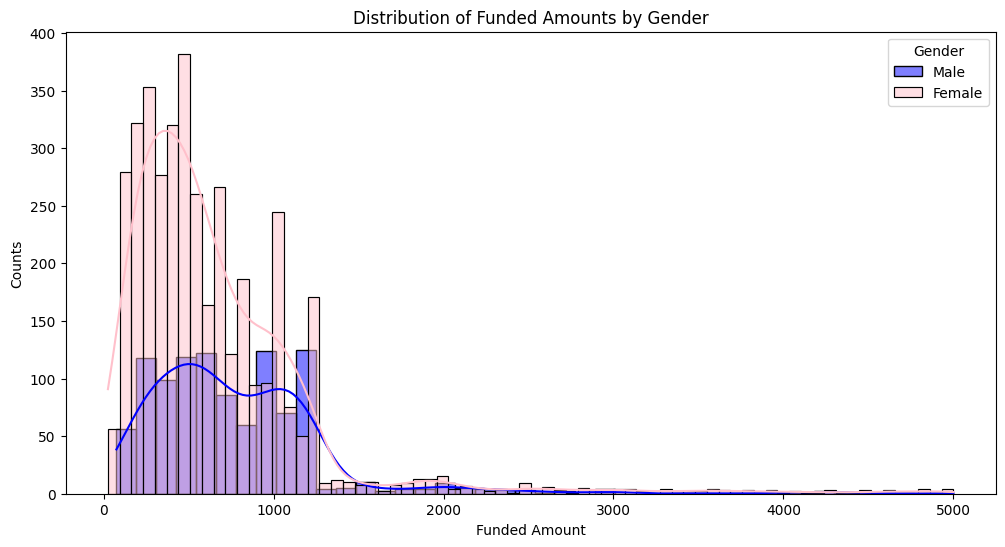

In [ ]:
# Filter the dataFrame for each gender
male_data = single_id[(single_id['borrowers.gender'] == 'M') & (single_id['funded_amount'] < 10000)]
female_data = single_id[(single_id['borrowers.gender'] == 'F') & (single_id['funded_amount'] < 10000)]


plt.figure(figsize=(12, 6))


# Plot histogram
sns.histplot(data=male_data, x='funded_amount', kde=True, label='Male', color='blue')
sns.histplot(data=female_data, x='funded_amount', kde=True, label='Female', color='pink')


plt.title('Distribution of Funded Amounts by Gender')
plt.xlabel('Funded Amount')
plt.ylabel('Counts')
plt.legend(title='Gender')

plt.show()


### Insight into the activities of the applicants

In [ ]:
single_id["activity"].value_counts()

Clothing Sales           372
Food Production/Sales    360
Retail                   343
General Store            321
Farming                  252
                        ... 
Property                   1
Entertainment              1
Film                       1
Land Rental                1
Dental                     1
Name: activity, Length: 126, dtype: int64

#### The top 30 activities of applicants

<ipython-input-22-8caca3bcd76e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




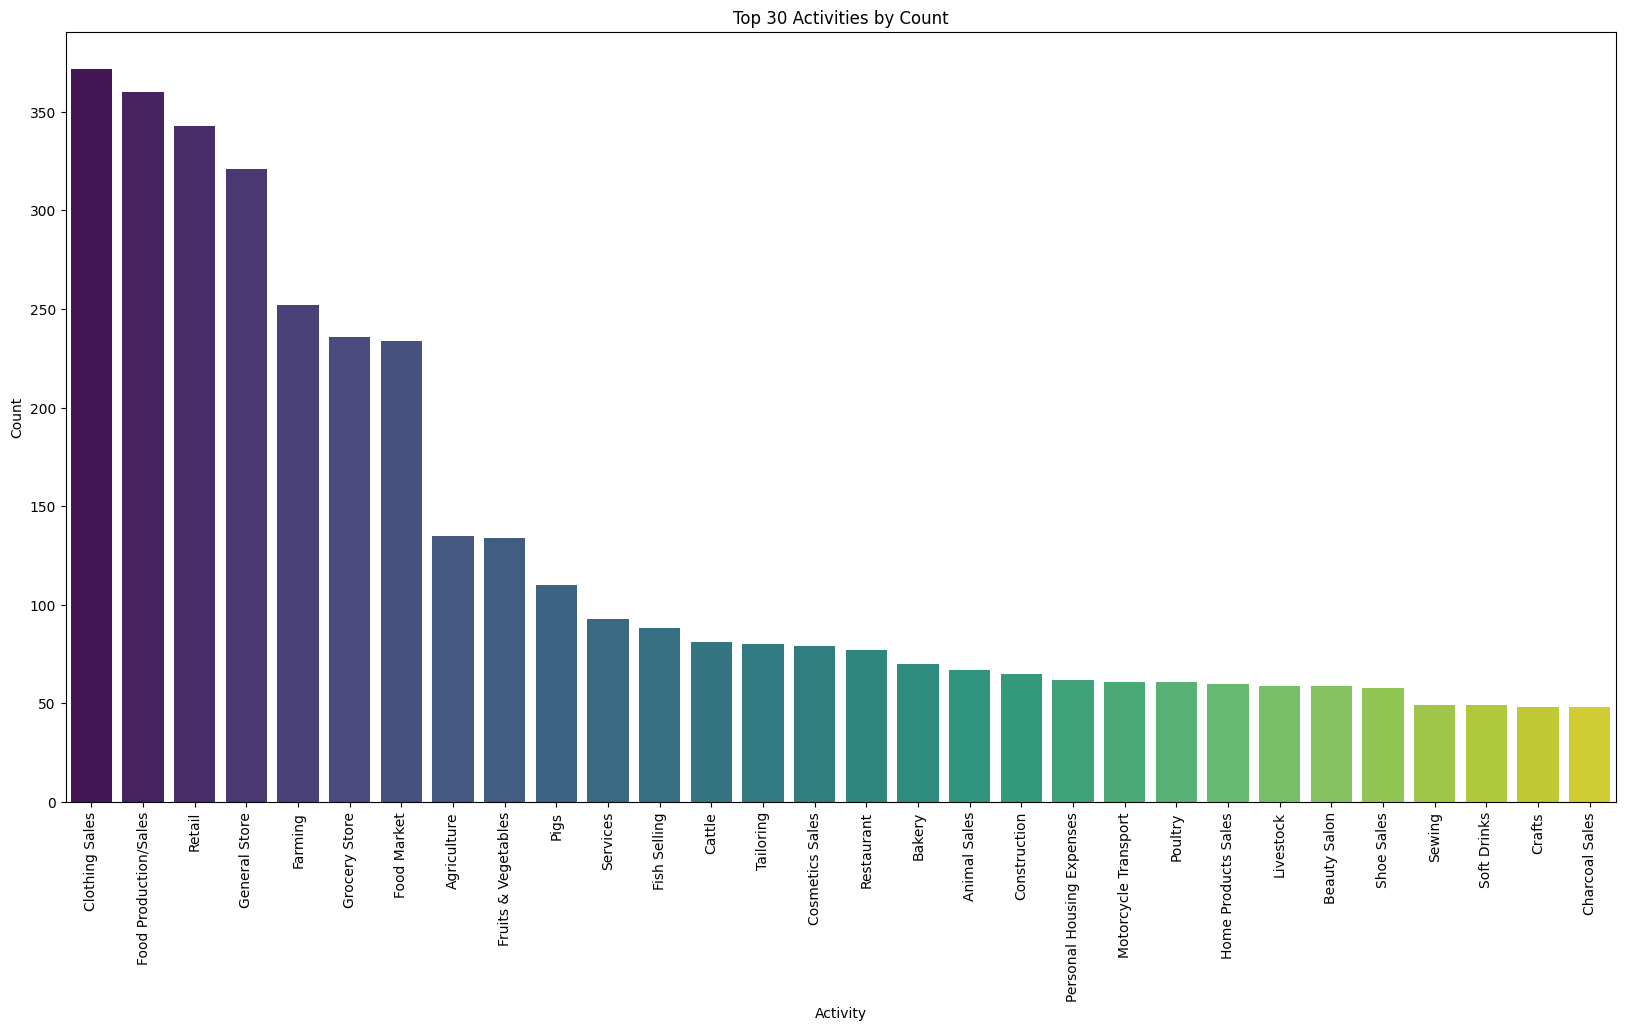

In [ ]:
# Calculate the count of each activity
activity_counts = single_id['activity'].value_counts().head(30)


plt.figure(figsize=(20, 10))

#Plotting a bar chart
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Top 30 Activities by Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.show()


### Insights into the target-variable, Status

##### Pie-chart to show the distribution

In [ ]:
#Pie chart for the distribution of the classes
classes = single_id["status"].value_counts()
pie=px.pie(values= classes, names=["paid", "in_repayment", "defaulted"],title= "Distribution classes status",
           color_discrete_sequence=px.colors.qualitative.Set3)

#Changing layout
pie.update_layout(
    font_family="Calibri",
    title_font_family="Calibri black",)
pie.show()

#### Counts of default by gender

In [ ]:
#the amount of male counts
male_counts = single_id[single_id['borrowers.gender'] == 'M']['status'].value_counts()
pie=px.pie(values= male_counts , names=["paid", "in_repayment", "defaulted"],title= "Distribution of status for males",
           color_discrete_sequence=px.colors.qualitative.Set2)


pie.update_layout(
    font_family="Calibri ",
    title_font_family="Calibri black ")
pie.show()

In [ ]:
#the amount of female counts
other_gender_counts = single_id[single_id['borrowers.gender'] == 'F']['status'].value_counts()
pie=px.pie(values= other_gender_counts, names=["paid", "in_repayment", "defaulted"],title= "Distribution of status for females",
           color_discrete_sequence=px.colors.qualitative.Set2)

#Changing layout
pie.update_layout(
    font_family="Calibri",
    title_font_family="Calibri black")
pie.show()

#### The default cases per sector

In [ ]:
filtered_data = single_id[single_id['status'] == 'defaulted']

# Calculate the count of defaulted cases for each sector
default_counts_per_sector = filtered_data.groupby('sector').size().reset_index(name='Count')

# Create a pie chart using Plotly Express
fig = px.pie(default_counts_per_sector, values='Count', names='sector', title='Defaulted Cases per Sector')

# Show the pie chart
fig.show()

#### The default cases per country

In [ ]:
filtered_data = single_id[single_id['status'] == 'defaulted']

# Calculating the count of defaulted cases for each sector
default_counts_per_sector = filtered_data.groupby('location.country').size().reset_index(name='Count')

# Create a pie chart
fig = px.pie(default_counts_per_sector, values='Count', names='location.country', title='Defaulted Cases per Country')

fig.show()

#### The paid/in repayment cases per country

In [ ]:
# Filter for paid and in_repayment loans
filtered_data = single_id[single_id['status'].isin(['paid', 'in_repayment'])]

# Calculate percentage of each country
country_counts = filtered_data['location.country'].value_counts(normalize=True)

# Filter out countries with 5% or less
threshold = 0.05
country_counts = country_counts[country_counts > threshold]

# Create a DataFrame for Plotly Express
plot_data = pd.DataFrame({'Country': country_counts.index, 'Percentage': country_counts.values})

# Plot the pie chart using Plotly Express
fig = px.pie(plot_data, names='Country', values='Percentage', title='Paid and In Repayment Cases by Country (Share > 5%)')
fig.show()

####Cases per country and gender

In [ ]:
# Filter data for defaulted, paid, and repayment cases
filtered_data = single_id[single_id['status'].isin(['defaulted', 'paid', 'repayment'])]

# Calculate the count of cases for each country, gender, and status
counts_per_country_gender_status = filtered_data.groupby(['location.country', 'borrowers.gender', 'status']).size().reset_index(name='Count')

# Calculate the total count for each gender and status
total_counts_per_gender_status = counts_per_country_gender_status.groupby(['borrowers.gender', 'status'])['Count'].sum().reset_index(name='TotalCount')

# Merge counts and totals to calculate percentages
merged_data = pd.merge(counts_per_country_gender_status, total_counts_per_gender_status, on=['borrowers.gender', 'status'])

# Calculate percentages
merged_data['Percentage'] = merged_data['Count'] / merged_data['TotalCount']

# Set the threshold for filtering out country subgroups
threshold = 0.05

# Filter data based on the threshold
filtered_data = merged_data[merged_data['Percentage'] > threshold]

# Separate the data for different statuses
default_data = filtered_data[filtered_data['status'] == 'defaulted']
paid_repayment_data = filtered_data[filtered_data['status'].isin(['paid', 'repayment'])]

# Create a pie chart for defaulted cases by country for males
fig_default_male = px.pie(default_data[default_data['borrowers.gender'] == 'M'],
                          values='Count', names='location.country',
                          title='Defaulted Cases by Country for Males')

fig_default_male.show()

# Create a pie chart for defaulted cases by country for females
fig_default_female = px.pie(default_data[default_data['borrowers.gender'] == 'F'],
                            values='Count', names='location.country',
                            title='Defaulted Cases by Country for Females')

fig_default_female.show()

# Create a pie chart for paid/repayment cases by country for males
fig_paid_repayment_male = px.pie(paid_repayment_data[paid_repayment_data['borrowers.gender'] == 'M'],
                                values='Count', names='location.country',
                                title='Paid/Repayment Cases by Country for Males')

fig_paid_repayment_male.show()

# Create a pie chart for paid/repayment cases by country for females
fig_paid_repayment_female = px.pie(paid_repayment_data[paid_repayment_data['borrowers.gender'] == 'F'],
                                  values='Count', names='location.country',
                                  title='Paid/Repayment Cases by Country for Females')

fig_paid_repayment_female.show()


#### Cases per language, as a proxy for country, and gender

In [ ]:
# Filter data for defaulted, paid, and repayment cases
filtered_data = single_id[single_id['status'].isin(['defaulted', 'paid', 'repayment'])]

# Calculate the count of cases for each language, gender, and status
counts_per_language_gender_status = filtered_data.groupby(['description.languages', 'borrowers.gender', 'status']).size().reset_index(name='Count')

# Calculate the total count for each gender and status
total_counts_per_gender_status = counts_per_language_gender_status.groupby(['borrowers.gender', 'status'])['Count'].sum().reset_index(name='TotalCount')

# Merge counts and totals to calculate percentages
merged_data = pd.merge(counts_per_language_gender_status, total_counts_per_gender_status, on=['borrowers.gender', 'status'])

# Calculate percentages
merged_data['Percentage'] = merged_data['Count'] / merged_data['TotalCount']

# Set the threshold for filtering out country subgroups
threshold = 0.00

# Filter data based on the threshold
filtered_data = merged_data[merged_data['Percentage'] > threshold]

# Separate the data for different statuses
default_data = filtered_data[filtered_data['status'] == 'defaulted']
paid_repayment_data = filtered_data[filtered_data['status'].isin(['paid', 'repayment'])]

# Create a pie chart for defaulted cases by language for males
fig_default_male = px.pie(default_data[default_data['borrowers.gender'] == 'M'],
                          values='Count', names='description.languages',
                          title='Defaulted Cases by Language for Males')

fig_default_male.show()

# Create a pie chart for defaulted cases by language for females
fig_default_female = px.pie(default_data[default_data['borrowers.gender'] == 'F'],
                            values='Count', names='description.languages',
                            title='Defaulted Cases by Language for Females')

fig_default_female.show()

# Create a pie chart for paid/repayment cases by language for males
fig_paid_repayment_male = px.pie(paid_repayment_data[paid_repayment_data['borrowers.gender'] == 'M'],
                                values='Count', names='description.languages',
                                title='Paid/Repayment Cases by Language for Males')

fig_paid_repayment_male.show()

# Create a pie chart for paid/repayment cases by language for females
fig_paid_repayment_female = px.pie(paid_repayment_data[paid_repayment_data['borrowers.gender'] == 'F'],
                                  values='Count', names='description.languages',
                                  title='Paid/Repayment Cases by Language for Females')

fig_paid_repayment_female.show()


## Pre-processing the data

The data initially included 42122 entries, however there were an intial amount of 5000 applicants. This is because the data is an event-log. Due to the nature of this type of data, only the most recent entry of each applicant will be used. This will allow the classifier to focus on the most recent and potentially most relevant information for classification, eliminating noise or less relevant historical data.

In [ ]:
data = data.sort_values(by='processed_date', ascending=False).groupby('id').head(1)

#### Dropping irrelevant features and rows

In [ ]:
missing_data_per_column = data.isnull().sum()
print("Missing values per column:\n", missing_data_per_column)

Missing values per column:
 id                                           0
description.languages                     1737
status                                       0
funded_amount                                0
paid_amount                                100
activity                                     0
sector                                       0
location.country_code                       42
location.country                             0
location.town                              133
location.geo.level                           2
partner_id                                   2
borrowers.gender                             7
borrowers.pictured                           7
terms.disbursal_amount                       7
terms.disbursal_currency                     7
terms.disbursal_date                         7
terms.loan_amount                            7
terms.loss_liability.nonpayment              7
terms.loss_liability.currency_exchange       7
posted_date                     

#### These 7 id cases happen to miss data for at least half of the variables and will therefore be deleted


In [ ]:
rows_with_missing_in_column = data[data["amount"].isnull()]

#Display rows with missing values
#print(rows_with_missing_in_column)

In [ ]:
delete = {'id': [118319,4034,62421,67625,71359,96685,101696]}
for column, values_to_delete in delete.items():
    data = data[~data[column].isin(values_to_delete)]

##### Some redundant features with a lot of missing values are also deleted

In [ ]:
#While the country is represented in all of them the country code is missing. Since this is a redundant feature it will be deleted.
#The'location.town' will be dropped as well since the coordinates are not missing and represent the same value.

data = data.drop(columns=['location.country_code','location.town' ])


The rest of the missing values are a case of it not being applicable to each applicant, such as "defaulted_date" or "delinquent". Therefore when categorising these, they will be coded as a 0 or other.

In [ ]:
#Fill in all NaN as 0
data = data.fillna(0)

### Encoding the categorical values

#### Ordinal values will be encoded  by using labelencoder

The target variable will be encoded as either a "1" for  a defaulted status and 0 for either paid or in repayment. Because we are interested in finding the cases that are defaulted. Mapping will also be used to encode gender, which will later be necessary for rewweighing.

In [ ]:
#Encoding the target_variable
mapping = {'defaulted': 1, 'in_repayment': 0, 'paid': 0}
data['status'] = data['status'].map(mapping)

# encoding gender
data['borrowers.gender'] = data['borrowers.gender'].map({'F': 1, 'M': 0})

# Convert 'borrowers.gender' to numeric
data['borrowers.gender'] = pd.to_numeric(data['borrowers.gender'])

In [ ]:
#location.geo.level	will also be encoded
label_encoder = LabelEncoder()
# Fitting LabelEncoder to 'location.geo.level' column and transform the categories into numerical labels
data['location.geo.level'] = label_encoder.fit_transform(data['location.geo.level'])
print(data)

          id description.languages  status  funded_amount  paid_amount  \
13863  16544                    en       1            200          0.0   
30269  66998                    en       1            900          0.0   
31080  70617                    en       1            250          0.0   
30047  66227                    en       1           1350          0.0   
31051  70408                    en       1           1125          0.0   
...      ...                   ...     ...            ...          ...   
37       213                    en       0            225        225.0   
18       183                    en       0            500        500.0   
145      629                    en       0            200        200.0   
4        156                    en       0            500        500.0   
21       186                    en       0            500        500.0   

             activity        sector    location.country  location.geo.level  \
13863    Beauty Salon      Servi

#### Transforming the other categorical data by using one-hot encoding

In [ ]:
# get_dummies
encoded_df = pd.get_dummies(data, columns=['description.languages', 'activity', 'sector', 'location.country',
                                           'borrowers.pictured', 'terms.disbursal_currency',
                                           'terms.loss_liability.nonpayment', 'terms.loss_liability.currency_exchange'])

# Now, 'encoded_df' contains the dummy encoded columns along with the restored 'borrowers.gender' column
encoded_df.head()

,id,status,funded_amount,paid_amount,location.geo.level,partner_id,borrowers.gender,terms.disbursal_amount,terms.disbursal_date,terms.loan_amount,posted_date,funded_date,journal_totals.entries,paid_date,defaulted_date,terms.local_payments.due_date,terms.local_payments.amount,terms.scheduled_payments.due_date,terms.scheduled_payments.amount,delinquent,amount,payment_id,local_amount,processed_date,rounded_local_amount,settlement_date,lat,lon,description.languages_0,description.languages_en,description.languages_es,description.languages_fr,description.languages_id,description.languages_ru,activity_Agriculture,activity_Animal Sales,activity_Arts,activity_Auto Repair,activity_Bakery,activity_Barber Shop,activity_Beauty Salon,activity_Bicycle Repair,activity_Bicycle Sales,activity_Blacksmith,activity_Bookstore,activity_Bricks,activity_Butcher Shop,activity_Cafe,activity_Call Center,activity_Carpentry,activity_Catering,activity_Cattle,activity_Cement,activity_Cereals,activity_Charcoal Sales,activity_Cheese Making,activity_Cloth & Dressmaking Supplies,activity_Clothing,activity_Clothing Sales,activity_Cobbler,activity_Computers,activity_Construction,activity_Construction Supplies,activity_Cosmetics Sales,activity_Crafts,activity_Dairy,activity_Decorations Sales,activity_Dental,activity_Electrical Goods,activity_Electrician,activity_Electronics Repair,activity_Electronics Sales,activity_Embroidery,activity_Entertainment,activity_Farm Supplies,activity_Farming,activity_Film,activity_Fish Selling,activity_Fishing,activity_Flowers,activity_Food,activity_Food Market,activity_Food Production/Sales,activity_Food Stall,activity_Fruits & Vegetables,activity_Fuel/Firewood,activity_Furniture Making,activity_Games,activity_General Store,activity_Goods Distribution,activity_Grocery Store,activity_Hardware,activity_Health,activity_Home Products Sales,activity_Hotel,activity_Internet Cafe,activity_Jewelry,activity_Knitting,activity_Land Rental,activity_Laundry,activity_Liquor Store / Off-License,activity_Livestock,activity_Machine Shop,activity_Manufacturing,activity_Medical Clinic,activity_Metal Shop,activity_Milk Sales,activity_Mobile Phones,activity_Motorcycle Repair,activity_Motorcycle Transport,activity_Movie Tapes & DVDs,activity_Music Discs & Tapes,activity_Musical Performance,activity_Natural Medicines,activity_Office Supplies,activity_Paper Sales,activity_Party Supplies,activity_Perfumes,activity_Personal Education Expenses,activity_Personal Housing Expenses,activity_Personal Products Sales,activity_Personal Purchases,activity_Pharmacy,activity_Phone Accessories,activity_Phone Use Sales,activity_Photography,activity_Pigs,activity_Plastics Sales,activity_Poultry,activity_Printing,activity_Property,activity_Pub,activity_Recycling,activity_Restaurant,activity_Retail,activity_Rickshaw,activity_Secretarial Services,activity_Services,activity_Sewing,activity_Shoe Sales,activity_Soft Drinks,activity_Souvenir Sales,activity_Spare Parts,activity_Tailoring,activity_Taxi,activity_Teaching and Schools,activity_Textiles,activity_Timber Sales,activity_Tourism,activity_Transportation,activity_Traveling Sales,activity_Upholstery,activity_Used Clothing,activity_Utilities,activity_Vehicle Repairs,activity_Veterinary Sales,activity_Waste Management,activity_Water Distribution,activity_Weaving,activity_Wholesale,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,sector_Housing,sector_Manufacturing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_Wholesale,location.country_Afghanistan,location.country_Armenia,location.country_Azerbaijan,location.country_Benin,location.country_Bolivia,location.country_Bosnia and Herzegovina,location.country_Bulgaria,location.country_Cambodia,location.country_Cameroon,location.country_Costa Rica,location.country_Cote D'Ivoire,location.country_Dominican Republic,location.country_Ecuador,location.country_El Salvador,locatio

#### Since datetime datatypes can not be used as input for models, all features containing dates will be converted into seperate year, month and day columns

In [ ]:
#Creating a function to perform the conversion more efficiently
def extract_time_features(df, timestamp_columns):
    for col in timestamp_columns:
        df[col] = pd.to_datetime(df[col],errors='coerce')

    # Extract time components for each timestamp column
    for col in timestamp_columns:
        df[col + '_Year'] = df[col].dt.year
        df[col + '_Month'] = df[col].dt.month  # Abbreviated month name
        df[col + '_Day'] = df[col].dt.day
        # Add more time components as needed
    df = df.drop(columns=timestamp_columns)
    df = df.fillna(0)



    return df

result_df = extract_time_features(encoded_df, ['terms.disbursal_date', 'posted_date', 'defaulted_date','funded_date','paid_date','terms.scheduled_payments.due_date',
                                               'terms.local_payments.due_date','processed_date','settlement_date'])


#### Normalizing the data

In [ ]:
ids = ['id','partner_id','payment_id', 'status']
id_columns = result_df[ids]

# Exclude 'id' columns for normalization
numerical_columns = result_df.drop(columns=id_columns)

# Manually normalize numerical columns
normalized_numerical = (numerical_columns - numerical_columns.min()) / (numerical_columns.max() - numerical_columns.min())

# Combine 'id' column with the normalized numerical columns
df_normalized = pd.concat([id_columns, normalized_numerical], axis=1)


In [ ]:
df_normalized.head()

,id,partner_id,payment_id,status,funded_amount,paid_amount,location.geo.level,borrowers.gender,terms.disbursal_amount,terms.loan_amount,journal_totals.entries,terms.local_payments.amount,terms.scheduled_payments.amount,delinquent,amount,local_amount,rounded_local_amount,lat,lon,description.languages_0,description.languages_en,description.languages_es,description.languages_fr,description.languages_id,description.languages_ru,activity_Agriculture,activity_Animal Sales,activity_Arts,activity_Auto Repair,activity_Bakery,activity_Barber Shop,activity_Beauty Salon,activity_Bicycle Repair,activity_Bicycle Sales,activity_Blacksmith,activity_Bookstore,activity_Bricks,activity_Butcher Shop,activity_Cafe,activity_Call Center,activity_Carpentry,activity_Catering,activity_Cattle,activity_Cement,activity_Cereals,activity_Charcoal Sales,activity_Cheese Making,activity_Cloth & Dressmaking Supplies,activity_Clothing,activity_Clothing Sales,activity_Cobbler,activity_Computers,activity_Construction,activity_Construction Supplies,activity_Cosmetics Sales,activity_Crafts,activity_Dairy,activity_Decorations Sales,activity_Dental,activity_Electrical Goods,activity_Electrician,activity_Electronics Repair,activity_Electronics Sales,activity_Embroidery,activity_Entertainment,activity_Farm Supplies,activity_Farming,activity_Film,activity_Fish Selling,activity_Fishing,activity_Flowers,activity_Food,activity_Food Market,activity_Food Production/Sales,activity_Food Stall,activity_Fruits & Vegetables,activity_Fuel/Firewood,activity_Furniture Making,activity_Games,activity_General Store,activity_Goods Distribution,activity_Grocery Store,activity_Hardware,activity_Health,activity_Home Products Sales,activity_Hotel,activity_Internet Cafe,activity_Jewelry,activity_Knitting,activity_Land Rental,activity_Laundry,activity_Liquor Store / Off-License,activity_Livestock,activity_Machine Shop,activity_Manufacturing,activity_Medical Clinic,activity_Metal Shop,activity_Milk Sales,activity_Mobile Phones,activity_Motorcycle Repair,activity_Motorcycle Transport,activity_Movie Tapes & DVDs,activity_Music Discs & Tapes,activity_Musical Performance,activity_Natural Medicines,activity_Office Supplies,activity_Paper Sales,activity_Party Supplies,activity_Perfumes,activity_Personal Education Expenses,activity_Personal Housing Expenses,activity_Personal Products Sales,activity_Personal Purchases,activity_Pharmacy,activity_Phone Accessories,activity_Phone Use Sales,activity_Photography,activity_Pigs,activity_Plastics Sales,activity_Poultry,activity_Printing,activity_Property,activity_Pub,activity_Recycling,activity_Restaurant,activity_Retail,activity_Rickshaw,activity_Secretarial Services,activity_Services,activity_Sewing,activity_Shoe Sales,activity_Soft Drinks,activity_Souvenir Sales,activity_Spare Parts,activity_Tailoring,activity_Taxi,activity_Teaching and Schools,activity_Textiles,activity_Timber Sales,activity_Tourism,activity_Transportation,activity_Traveling Sales,activity_Upholstery,activity_Used Clothing,activity_Utilities,activity_Vehicle Repairs,activity_Veterinary Sales,activity_Waste Management,activity_Water Distribution,activity_Weaving,activity_Wholesale,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,sector_Housing,sector_Manufacturing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_Wholesale,location.country_Afghanistan,location.country_Armenia,location.country_Azerbaijan,location.country_Benin,location.country_Bolivia,location.country_Bosnia and Herzegovina,location.country_Bulgaria,location.country_Cambodia,location.country_Cameroon,location.country_Costa Rica,location.country_Cote D'Ivoire,location.country_Dominican Republic,location.country_Ecuador,location.country_El Salvador,location.country_Gaza,location.country_Ghana,location.country_Guatemala,location.country_Haiti,location.country_Honduras,location.country_Indonesia,location.country_Iraq,lo

In [ ]:
# Save DataFrame to CSV file
df_normalized.to_csv('loans_clean.csv', index=False)